## Simulation Analysis

This notebook will go over analyzing simulated data gathered from 2-Simulation-Generation.

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.synth import *

from utils.ratios import *
from utils.analysis import *

### Settings

In [2]:
THETA_BAND = [4, 8]
BETA_BAND = [15,30]

## Center Frequency

In [3]:
# Load data
cf_low = np.load("./dat/cf_data_low.npy")
cf_high = np.load("./dat/cf_data_high.npy")

In [5]:
# Gather center frequency values iterated across for both low and high band
cf_low_syns = []
cf_high_syns = []

for val in cf_low[2]:
    cf_low_syns.append(val.gaussian_params[0][0])
for val in cf_high[2]:
    cf_high_syns.append(val.gaussian_params[0][0])

In [10]:
cf_low

array([array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5,
       34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. ,
       39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5,
       45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. ]),
       array([[1.02520592, 0.73841926, 0.68412144, ..., 0.02038431, 0.02029668,
        0.02024815],
       [1.00663909, 0.72817419, 0.63431596, ..., 0.0206399 , 0.02028065,
        0.02012521],
       [1.01221644, 0.69984095, 0.60085822, ..., 0.02030352, 0.02048274,
        0.02041002],
       ...,
       [0.99773632, 0.67055846, 0

In [76]:
# Calculate ratios
cf_low_ratios = []
cf_high_ratios = []

for cf in cf_low[1]:
    cf_low_ratios.append(calc_band_ratio(cf_low[0], cf, THETA_BAND, BETA_BAND))
    
for cf in cf_high[1]:
    cf_high_ratios.append(calc_band_ratio(cf_high[0], cf, THETA_BAND, BETA_BAND))

In [77]:
# Make DataFrame of Center Frequencies and coresponding ratio values
df_cf_low_cols = np.array([cf_low_ratios, cf_low_syns]).T.tolist()
df_cf_high_cols = np.array([cf_high_ratios, cf_high_syns]).T.tolist()

df_cf_low = pd.DataFrame(df_cf_low_cols, columns=["Band_Ratio", "Low_Center_Frequency" ])
df_cf_high = pd.DataFrame(df_cf_high_cols,columns=["Band_Ratio", "High_Center_Frequency" ])

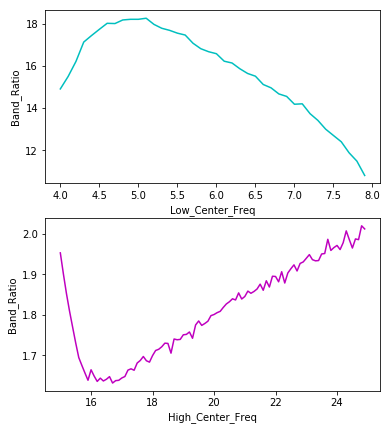

In [90]:
# Subplots - define the figure
fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Low_Center_Freq")
ax[1].set_xlabel("High_Center_Freq")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

# Fill in axes
ax[0].plot(df_cf_low.Low_Center_Frequency, df_cf_low.Band_Ratio,color='c')
ax[1].plot(df_cf_high.High_Center_Frequency, df_cf_high.Band_Ratio,color='m')


## Amplitude

In [79]:
# Load data
amp_low = np.load("./dat/amp_data_low.npy")
amp_high = np.load("./dat/amp_data_high.npy")

In [80]:
# Gather Amplitude vales
amp_low_syns = []
amp_high_syns = []

for val in amp_low[2]:
    amp_low_syns.append(val.gaussian_params[0][1])
for val in amp_high[2]:
    amp_high_syns.append(val.gaussian_params[0][1])

In [81]:
# Calculate band ratios
amp_low_ratios = []
amp_high_ratios = []

for amp in amp_low[1]:
    amp_low_ratios.append(calc_band_ratio(amp_low[0], amp, THETA_BAND, BETA_BAND))
    
for amp in amp_high[1]:
    amp_high_ratios.append(calc_band_ratio(amp_high[0], amp, THETA_BAND, BETA_BAND))

In [82]:
# Create DataFrame
df_amp_low_cols = np.array([amp_low_ratios, amp_low_syns]).T.tolist()
df_amp_high_cols = np.array([amp_high_ratios, amp_high_syns]).T.tolist()

df_amp_low = pd.DataFrame(df_amp_low_cols, columns=["Band_Ratio", "Low_Amplitude"])
df_amp_high = pd.DataFrame(df_amp_high_cols,columns=["Band_Ratio", "High_Amplitude"])

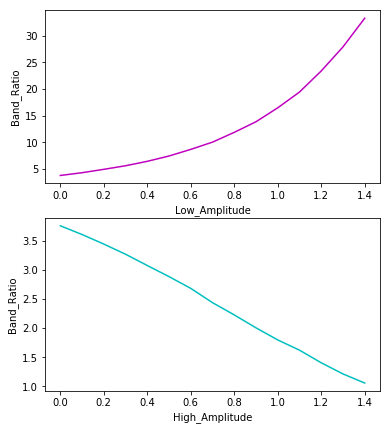

In [91]:
# Subplots - define the figure
fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Low_Amplitude")
ax[1].set_xlabel("High_Amplitude")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

# Fill in axes
ax[0].plot(df_amp_low.Low_Amplitude,df_amp_low.Band_Ratio,color='m')
ax[1].plot(df_amp_high.High_Amplitude,df_amp_high.Band_Ratio,color='c')

## Bandwidth

In [84]:
bw_low = np.load("./dat/bw_data_low.npy")
bw_high = np.load("./dat/bw_data_high.npy")

In [85]:
bw_low_syns = []
bw_high_syns = []

for val in bw_low[2]:
    bw_low_syns.append(val.gaussian_params[0][2])
for val in bw_high[2]:
    bw_high_syns.append(val.gaussian_params[0][2])

In [86]:
bw_low_ratios = []
bw_high_ratios = []

for bw in bw_low[1]:
    bw_low_ratios.append(calc_band_ratio(bw_low[0], bw, THETA_BAND, BETA_BAND))
    
for bw in bw_high[1]:
    bw_high_ratios.append(calc_band_ratio(bw_high[0], bw, THETA_BAND, BETA_BAND))

In [87]:
df_bw_low_cols = np.array([bw_low_ratios, bw_low_syns]).T.tolist()
df_bw_high_cols = np.array([bw_high_ratios, bw_high_syns]).T.tolist()

df_bw_low = pd.DataFrame(df_bw_low_cols, columns=["Band_Ratio", "Low_BandWidth"])
df_bw_high = pd.DataFrame(df_bw_high_cols,columns=["Band_Ratio", "High_BandWidth"])

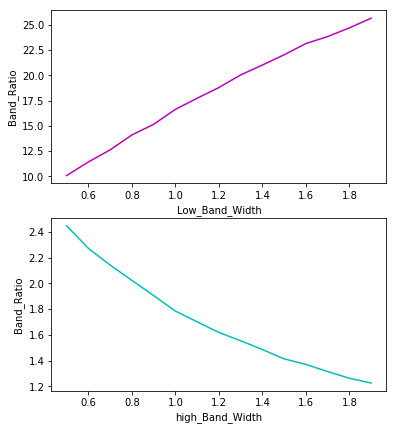

In [92]:
# Subplots - define the figure
fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Low_Band_Width")
ax[1].set_xlabel("high_Band_Width")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

ax[0].plot(df_bw_low.Low_BandWidth, df_bw_low.Band_Ratio,color='m')
ax[1].plot(df_bw_high.High_BandWidth, df_bw_high.Band_Ratio,color='c')

## Power Law Exponent

In [93]:
slope = np.load("./dat/slope_data.npy")

In [94]:
slope_syns = []

for val in slope[2]:
    slope_syns.append(val.background_params[1])

In [95]:
slope_ratios = []

for sl in slope[1]:
    slope_ratios.append(calc_band_ratio(slope[0], sl, THETA_BAND, BETA_BAND))

In [96]:
slope_cols = np.array([slope_ratios, slope_syns]).T.tolist()

df_slope = pd.DataFrame(slope_cols, columns=["Band_Ratio", "Slope"])

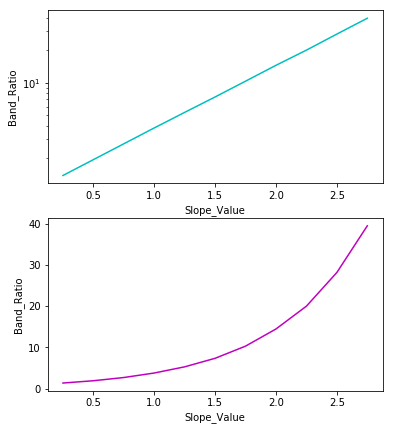

In [98]:
fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Slope_Value")
ax[1].set_xlabel("Slope_Value")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

# LOG SCALING
ax[0].set_yscale('log')
#ax[0].set_xscale('log')

ax[0].plot(df_slope.Slope, df_slope.Band_Ratio,color='c')
ax[1].plot(df_slope.Slope, df_slope.Band_Ratio,color='m')

## Rotation

In [43]:
# freqs, rot_vale, ps
rot = np.load("./dat/rot_data.npy")
rot_freqs = [ rot[0][0][0], rot[0][0][-1]]
rot_freqs

[1.0, 50.0]

In [44]:
rot_ratio_diff = []

In [45]:
freqs, ps = gen_power_spectrum(rot_freqs, [0,1],[])

In [46]:
control_ratio = calc_band_ratio(freqs, ps, THETA_BAND, BETA_BAND)
control_ratio

3.79158898019441

In [47]:
for rt in rot:
    #print(set(rt[1]))
    altered_ratio = calc_band_ratio(rt[0], rt[2], THETA_BAND, BETA_BAND)
    print(altered_ratio)
    rot_ratio_diff.append(control_ratio - altered_ratio)

55.19208924977676
42.15860119271494
32.21084485876162
24.6167064816212
18.818052910586392
14.389341504582001
11.00608267988936
8.420809293709464
6.444765503360153
4.9339532880568076
3.7784990765906206
2.894549990402009
2.2180974562613627
1.7002693654308925
1.3037412257476242


In [48]:
rot_ratio_diff


[-51.400500269582345,
 -38.36701221252053,
 -28.419255878567206,
 -20.82511750142679,
 -15.026463930391982,
 -10.597752524387591,
 -7.21449369969495,
 -4.629220313515054,
 -2.653176523165743,
 -1.1423643078623975,
 0.013089903603789477,
 0.8970389897924012,
 1.5734915239330474,
 2.091319614763518,
 2.487847754446786]

In [ ]:






slope_cols = np.array([slope_ratios, slope_syns]).T.tolist()

df_slope = pd.DataFrame(slope_cols, columns=["Band_Ratio", "Slope"])

fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Slope_Value")
ax[1].set_xlabel("Slope_Value")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

# LOG SCALING
ax[0].set_yscale('log')
#ax[0].set_xscale('log')

ax[0].plot(df_slope.Slope, df_slope.Band_Ratio,color='c')
ax[1].plot(df_slope.Slope, df_slope.Band_Ratio,color='m')

## Relative Power

### CF

In [42]:
rel_t_ps_cf_low = calc_group_relative_power(cf_low[0], cf_low[1], THETA_BAND)
rel_b_ps_cf_low = calc_group_relative_power(cf_low[0], cf_low[1], BETA_BAND)

rel_t_ps_cf_high = calc_group_relative_power(cf_high[0], cf_high[1], THETA_BAND)
rel_b_ps_cf_high = calc_group_relative_power(cf_high[0], cf_high[1], BETA_BAND)

In [43]:
cf_r_ratios_low = calc_group_rel_ratios(rel_t_ps_cf_low, rel_b_ps_cf_low)
cf_r_ratios_high = calc_group_rel_ratios(rel_t_ps_cf_high, rel_b_ps_cf_high)

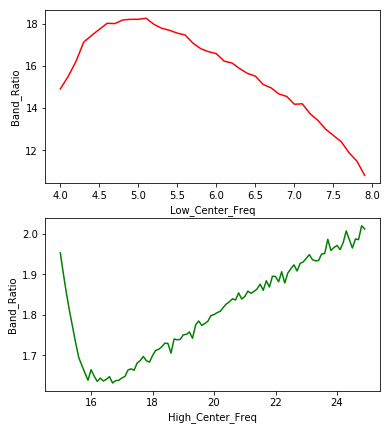

In [102]:
# Make DataFrame of Center Frequencies and coresponding ratio values
df_cf_low_cols = np.array([cf_r_ratios_low, cf_low_syns]).T.tolist()
df_cf_high_cols = np.array([cf_r_ratios_high, cf_high_syns]).T.tolist()

df_cf_low = pd.DataFrame(df_cf_low_cols, columns=["Relative_Ratio", "Low_Center_Frequency" ])
df_cf_high = pd.DataFrame(df_cf_high_cols,columns=["Relative_Ratio", "High_Center_Frequency" ])

# Subplots - define the figure
fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Low_Center_Freq")
ax[1].set_xlabel("High_Center_Freq")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

# Fill in axes
ax[0].plot(df_cf_low.Low_Center_Frequency, df_cf_low.Relative_Ratio,color='r')
ax[1].plot(df_cf_high.High_Center_Frequency, df_cf_high.Relative_Ratio,color='g')


In [103]:
rel_t_ps_amp_low = calc_group_relative_power(amp_low[0], amp_low[1], THETA_BAND)
rel_b_ps_amp_low = calc_group_relative_power(amp_low[0], amp_low[1], BETA_BAND)

rel_t_ps_amp_high = calc_group_relative_power(amp_high[0], amp_high[1], THETA_BAND)
rel_b_ps_amp_high = calc_group_relative_power(amp_high[0], amp_high[1], BETA_BAND)

In [104]:
amp_r_ratios_low = calc_group_rel_ratios(rel_t_ps_amp_low, rel_b_ps_amp_low)
amp_r_ratios_high = calc_group_rel_ratios(rel_t_ps_amp_high, rel_b_ps_amp_high)

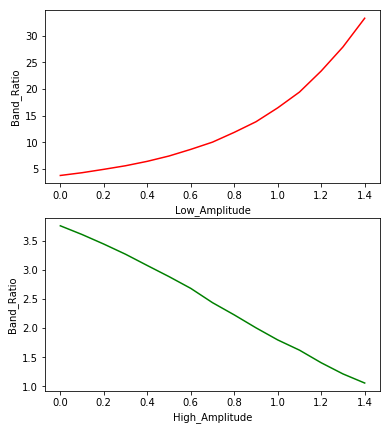

In [105]:
# Create DataFrame
df_amp_low_cols = np.array([amp_r_ratios_low, amp_low_syns]).T.tolist()
df_amp_high_cols = np.array([amp_r_ratios_high, amp_high_syns]).T.tolist()

df_amp_low = pd.DataFrame(df_amp_low_cols, columns=["Relative_Ratio", "Low_Amplitude"])
df_amp_high = pd.DataFrame(df_amp_high_cols,columns=["Relative_Ratio", "High_Amplitude"])

# Subplots - define the figure
fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Low_Amplitude")
ax[1].set_xlabel("High_Amplitude")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

# Fill in axes
ax[0].plot(df_amp_low.Low_Amplitude,df_amp_low.Relative_Ratio,color='r')
ax[1].plot(df_amp_high.High_Amplitude,df_amp_high.Relative_Ratio,color='g')

In [106]:
bw_low = np.load("./dat/bw_data_low.npy")
bw_high = np.load("./dat/bw_data_high.npy")

In [107]:
rel_t_ps_bw_low = calc_group_relative_power(bw_low[0], bw_low[1], THETA_BAND)
rel_b_ps_bw_low = calc_group_relative_power(bw_low[0], bw_low[1], BETA_BAND)

rel_t_ps_bw_high = calc_group_relative_power(bw_high[0], bw_high[1], THETA_BAND)
rel_b_ps_bw_high = calc_group_relative_power(bw_high[0], bw_high[1], BETA_BAND)

In [108]:
bw_r_ratios_low = calc_group_rel_ratios(rel_t_ps_bw_low, rel_b_ps_bw_low)
bw_r_ratios_high = calc_group_rel_ratios(rel_t_ps_bw_high, rel_b_ps_bw_high)

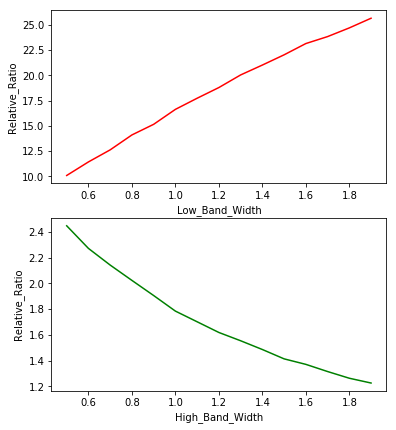

In [109]:
df_bw_low_cols = np.array([bw_r_ratios_low, bw_low_syns]).T.tolist()
df_bw_high_cols = np.array([bw_r_ratios_high, bw_high_syns]).T.tolist()

df_bw_low = pd.DataFrame(df_bw_low_cols, columns=["Relative_Ratio", "Low_BandWidth"])
df_bw_high = pd.DataFrame(df_bw_high_cols,columns=["Relative_Ratio", "High_BandWidth"])

# Subplots - define the figure
fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Low_Band_Width")
ax[1].set_xlabel("High_Band_Width")
ax[0].set_ylabel("Relative_Ratio")
ax[1].set_ylabel("Relative_Ratio")

ax[0].plot(df_bw_low.Low_BandWidth, df_bw_low.Relative_Ratio,color='r')
ax[1].plot(df_bw_high.High_BandWidth, df_bw_high.Relative_Ratio,color='g')

In [110]:
slope = np.load("./dat/slope_data.npy")

In [111]:
rel_t_ps_sl = calc_group_relative_power(slope[0], slope[1], THETA_BAND)
rel_b_ps_sl = calc_group_relative_power(slope[0], slope[1], BETA_BAND)

In [112]:
slope_r_ratios_low = calc_group_rel_ratios(rel_t_ps_sl, rel_b_ps_sl)

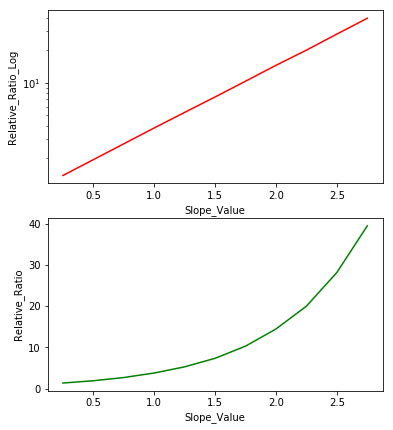

In [113]:
slope_cols = np.array([slope_r_ratios_low, slope_syns]).T.tolist()

df_slope = pd.DataFrame(slope_cols, columns=["Relative_Ratio", "Slope"])



fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Slope_Value")
ax[1].set_xlabel("Slope_Value")
ax[0].set_ylabel("Relative_Ratio_Log")
ax[1].set_ylabel("Relative_Ratio")

# LOG SCALING
ax[0].set_yscale('log')
#ax[0].set_xscale('log')

ax[0].plot(df_slope.Slope, df_slope.Relative_Ratio,color='r')
ax[1].plot(df_slope.Slope, df_slope.Relative_Ratio,color='g')
